<a href="https://colab.research.google.com/github/dursuninel/Bootstrap_Projem/blob/master/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os
from tqdm import tqdm
from random import shuffle
import shutil

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2023-12-11 17:28:55--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.155, 16.12.36.103, 52.219.156.43, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.5MB/s    in 5.5s    

2023-12-11 17:29:02 (10.5 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [ ]:
train_dir= "./datset/training"
test_dir= "./datset/testing/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')

Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
# model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

In [ ]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)

Epoch 1/20


<ipython-input-7-72183d3709fe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)


993/993 [==============================] - 27s 15ms/step - loss: 0.6752 - accuracy: 0.5671 - val_loss: 0.6290 - val_accuracy: 0.6730
Epoch 2/20
993/993 [==============================] - 15s 15ms/step - loss: 0.6123 - accuracy: 0.6719 - val_loss: 0.5430 - val_accuracy: 0.7440
Epoch 3/20
993/993 [==============================] - 15s 15ms/step - loss: 0.5543 - accuracy: 0.7202 - val_loss: 0.5375 - val_accuracy: 0.7260
Epoch 4/20
993/993 [==============================] - 15s 15ms/step - loss: 0.5059 - accuracy: 0.7538 - val_loss: 0.4797 - val_accuracy: 0.7650
Epoch 5/20
993/993 [==============================] - 15s 15ms/step - loss: 0.4649 - accuracy: 0.7840 - val_loss: 0.4844 - val_accuracy: 0.7640
Epoch 6/20
993/993 [==============================] - 15s 15ms/step - loss: 0.4358 - accuracy: 0.7998 - val_loss: 0.4448 - val_accuracy: 0.8030
Epoch 7/20
993/993 [==============================] - 15s 15ms/step - loss: 0.4120 - accuracy: 0.8147 - val_loss: 0.4150 - val_accuracy: 0.8040
Epo

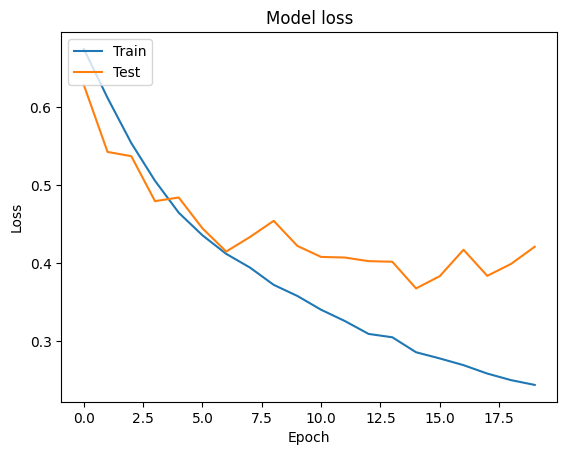

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def Single_Image_Prediction(file):
#     image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = img_to_array(image)
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Single_Image_Prediction('./datset/testing/8.jpg')

pred_value = model.predict(tf.image.resize(image, (50, 50)))

if pred_value < 0.5:
    print('Kedi')
else:
    print('Köpek')

NameError: ignored

# Yeni Bölüm